#
#
#
#
# Résultat
Je présente le résultat du développement sous la forme de ce notebook de démonstration de ma bibliothèque Python pour les options basket. Cette bibliothèque a été développée pour fournir des outils modulables pour modéliser les options basket. Vous trouverez ci-après un aperçu des principales fonctionnalités de la bibliothèque :

- **Modèles Financiers** : Implémentation de divers modèles financiers comme le modèle de Black-Scholes, les processus de Levy et les modèles de volatilité stochastique.
- **Méthodes Numériques** : Quelques méthodes numériques telles que les simulations de Monte Carlo ou la quadrature de gauss.
- **Génération et Analyse de Données** : Outils de génération données de marché fictives (s'appuyant sur les modèles disponibles au choix de l'utilisateur) et analyser des données, qu'elles soient réelles ou simulées.
- **Stratégies de Couverture** : Implémentation de stratégies de couverture. Pour le moment on n'a développé qu'une première version de la couverture delta
- **Flexibilité et Extensibilité** : Conception modulaire permettant une extension facile et l'ajout de nouveaux modèles et méthodes.

Ce notebook contient une série de démonstrations pour illustrer les possibilités que donnent cette bibliothèque

## Structure

La bibliothèque est organisée de manière modulaire avec les composants suivants :

- **models/** : Contient les implémentations de divers modèles financiers utilisés pour les options basket.
    - `base_model.py` : Classe de base pour les modèles financiers (factorise les méthodes communes à tous les modèles).
    - `black_scholes.py` : Implémentation du modèle de Black-Scholes pour les options basket.
    - `levy_processes.py` : Implémentation de différents processus de Levy.
    - `stochastic_volatility.py` : Implémentation des modèles de volatilité stochastique.
- **pricing/** : Contient des méthodes de tarification.
    - `analytical_approximations.py` : Approximations analytiques pour le prix d'une option basket
    - `finite_difference_bs.py` : Méthodes de différences finies pour Black-Scholes (non fonctionnel pour le moment).
    - `monte_carlo.py` : Méthodes de simulation Monte Carlo (et QMC).
    - `quadrature.py` : Méthodes de quadrature pour l'intégration numérique.
- **analysis/** : Contient des outils pour générer des données de marché fictives, et annalyser des données fictive ou bien réelles.
    - `generate_data.py` : Génération et simulation de données de marché fictives basées sur les modèles présentés dans ce rapport.
    - `market_analysis.py` : Analyse des données de marché.

J'éspère que ce notebook vous aidera à apprécier les fonctionnalités de cette bibliothèque et à comprendre comment elle peut être utilisée.

**Commençons !**

In [2]:
# Importation des modules nécessaires
import numpy as np
import matplotlib.pyplot as plt
from basketoptions.models.black_scholes import *
from basketoptions.models.levy_processes import *
from basketoptions.models.stochastic_volatility import *
from basketoptions.pricing.monte_carlo import *
from basketoptions.pricing.finite_difference_bs import *
from basketoptions.pricing.analytical_approximations import *
from basketoptions.hedge.delta_hedging import *
from basketoptions.analysis.generate_data import *
from basketoptions.analysis.market_analysis import *

# Configuration initiale pour les graphiques
plt.style.use('seaborn-v0_8-notebook')
%matplotlib inline

## Implémentation du modèle de Black-Scholes pour une option basket

Dans cette première section, nous allons calculer le prix d'une option basket en utilisant le modèle de Black-Scholes via les méthodes de Monte Carlo et Quasi-Monte Carlo (QMC). Nous allons également visualiser la distribution des prix de l'option.

### Étapes de la démonstration :
1. Définir les paramètres de l'option basket.
2. Utiliser Monte Carlo pour estimer le prix de l'option.
3. Utiliser la méthode QMC pour estimer le prix de l'option.
4. Visualiser la distribution des prix du basket (moyenne des sous-jacents pondérée par leurs poids).

In [19]:
# Paramètres de l'option basket
spot_prices = np.array([100, 105, 110])  # Prix initiaux des actifs sous-jacents
weights = np.array([0.4, 0.4, 0.2])  # Poids des actifs dans le panier
volatilities = np.array([0.2, 0.25, 0.3])  # Volatilités des actifs
correlation_matrix = np.array([
    [1.0, 0.5, 0.3],
    [0.5, 1.0, 0.4],
    [0.3, 0.4, 1.0]
])  # Matrice de corrélation entre les actifs
risk_free_rate = 0.05  # Taux d'intérêt sans risque
dividend_yields = np.array([0.02, 0.03, 0.01])  # Rendements des dividendes des actifs
time_to_maturity = 1.0  # Échéance en années
strike_price = 100  # Prix d'exercice de l'option
option_type = 'call'  # Type de l'option
num_steps = 252  # Nombre de pas dans la simulation

# Nombre de simulations
num_simulations = 150000

# Affichage des paramètres
print("Paramètres de l'option basket:")
print(f"spot_prices: {spot_prices}")
print(f"weights: {weights}")
print(f"volatilities: {volatilities}")
print(f"correlation_matrix: {correlation_matrix}")
print(f"risk_free_rate: {risk_free_rate}")
print(f"dividend_yields: {dividend_yields}")
print(f"time_to_maturity: {time_to_maturity}")
print(f"strike_price: {strike_price}")
print(f"option_type: {option_type}")
print(f"num_steps: {num_steps}")
print(f"num_simulations: {num_simulations}")

Paramètres de l'option basket:
spot_prices: [100 105 110]
weights: [0.4 0.4 0.2]
volatilities: [0.2  0.25 0.3 ]
correlation_matrix: [[1.  0.5 0.3]
 [0.5 1.  0.4]
 [0.3 0.4 1. ]]
risk_free_rate: 0.05
dividend_yields: [0.02 0.03 0.01]
time_to_maturity: 1.0
strike_price: 100
option_type: call
num_steps: 252
num_simulations: 150000


Prix estimé de l'option basket (Monte Carlo): 11.20


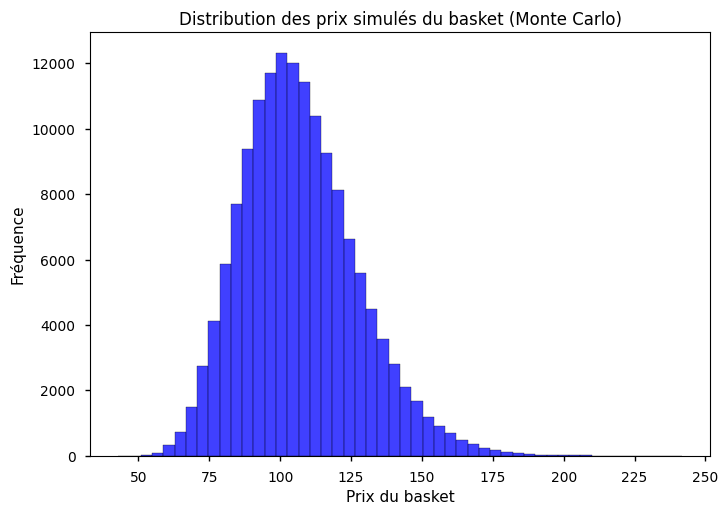

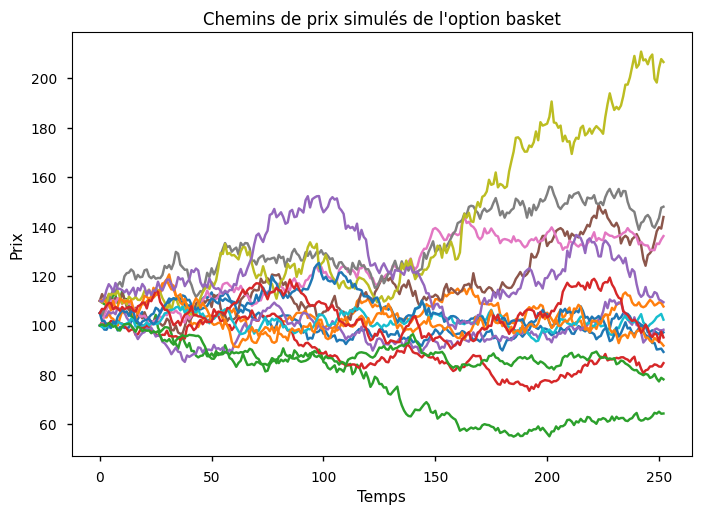

In [20]:
# Simulation Monte Carlo pour estimer le prix de l'option basket
from basketoptions.models.black_scholes import BlackScholesModel

# Création de l'objet BlackScholesModel
bs_model = BlackScholesModel(
    spot_prices=spot_prices,
    weights=weights,
    volatilities=volatilities,
    correlation_matrix=correlation_matrix,
    risk_free_rate=risk_free_rate,
    dividend_yields=dividend_yields,
    time_to_maturity=time_to_maturity,
    num_steps=num_steps
)

# Calcul du prix de l'option basket en utilisant la méthode Monte Carlo
option_price_mc = bs_model.price(strike_price, option_type, method='monte_carlo', num_paths=num_simulations)
print(f"Prix estimé de l'option basket (Monte Carlo): {option_price_mc:.2f}")

# Visualisation de la distribution des prix simulés
price_paths_mc = bs_model.generate_paths(num_simulations)
basket_prices_mc = np.dot(price_paths_mc[:, -1, :], weights)
plt.hist(basket_prices_mc, bins=50, alpha=0.75, color='blue', edgecolor='black')
plt.title('Distribution des prix simulés du basket (Monte Carlo)')
plt.xlabel('Prix du basket')
plt.ylabel('Fréquence')
plt.show()

# Visualisation de quelques chemins de prix simulés
for i in range(5):
    plt.plot(price_paths_mc[i])
plt.title('Chemins de prix simulés de l\'option basket')
plt.xlabel('Temps')
plt.ylabel('Prix')
plt.show()

Prix estimé de l'option basket (QMC): 11.21


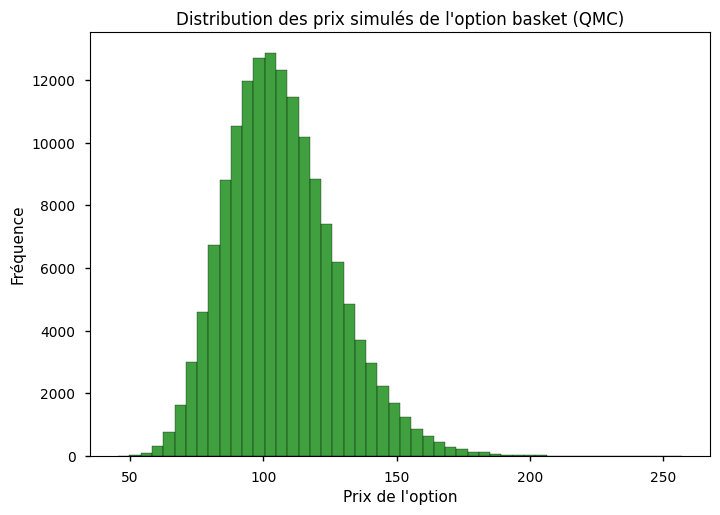

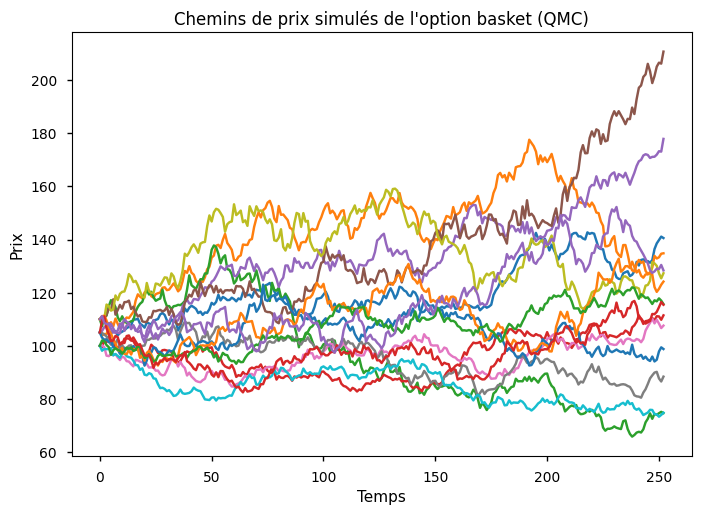

In [21]:
from scipy.stats import qmc

# Calcul du prix de l'option basket en utilisant la méthode Quasi-Monte Carlo (QMC)
option_price_qmc = bs_model.price(strike_price, option_type, method='QMC', num_paths=num_simulations)
print(f"Prix estimé de l'option basket (QMC): {option_price_qmc:.2f}")

# Génération de chemins de prix en utilisant une séquence de Halton
sampler = qmc.Halton(d=spot_prices.size * num_steps, scramble=True)
halton_seq_samples = sampler.random(n=num_simulations)
halton_seq_samples = norm.ppf(halton_seq_samples)  # Map to standard normal
halton_seq_samples = halton_seq_samples.reshape(num_simulations, num_steps, spot_prices.size)

price_paths_qmc = bs_model.generate_paths(num_simulations, sobol_seq_samples=halton_seq_samples)
basket_prices_qmc = np.dot(price_paths_qmc[:, -1, :], weights)

# Visualisation de la distribution des prix simulés
plt.hist(basket_prices_qmc, bins=50, alpha=0.75, color='green', edgecolor='black')
plt.title('Distribution des prix simulés de l\'option basket (QMC)')
plt.xlabel('Prix de l\'option')
plt.ylabel('Fréquence')
plt.show()

# Visualisation de quelques chemins de prix simulés
for i in range(5):
    plt.plot(price_paths_qmc[i])
plt.title('Chemins de prix simulés de l\'option basket (QMC)')
plt.xlabel('Temps')
plt.ylabel('Prix')
plt.show()

On en profite pour remarquer que les résultats donnés par Monte-Carlo et quasi-Monte Carlo sont consistents entre eux !
On rappelle effectivement que la différence principale entre ces deux méthode ne réside pas dans un résultat différent mais dans une vitesse de convergence différente.

## Implémentation et simulation d’un processus de Levy pour les options basket

Dans cette démonstration, nous allons implémenter et simuler des processus de Levy sur un basket. Nous allons également vi<sualiser les trajectoires générées par ces processus.

### Étapes de la démonstration :
1. Définir les paramètres du modèle de Levy.
2. Utiliser la simulation pour générer des trajectoires de prix.
3. Visualiser les trajectoires générées.

In [28]:
# Paramètres du modèle de Levy
spot_prices = np.array([100, 105, 110])  # Prix initiaux des actifs sous-jacents
weights = np.array([0.4, 0.4, 0.2])  # Poids des actifs dans le panier
correlation_matrix = np.array([
    [1.0, 0.5, 0.3],
    [0.5, 1.0, 0.4],
    [0.3, 0.4, 1.0]
])  # Matrice de corrélation entre les actifs
risk_free_rate = 0.05  # Taux d'intérêt sans risque
dividend_yields = np.array([0.02, 0.03, 0.025])  # Rendements des dividendes des actifs
time_to_maturity = 1.0  # Échéance en années
drift = np.array([0.02, 0.03, 0.025])  # Dérive des actifs
volatilities = np.array([0.2, 0.18, 0.22])  # Volatilités des actifs
jump_intensity = np.array([0.05, 0.05, 0.05])  # Réduction de l'intensité des sauts
jump_mean = np.array([0.0, 0.0, 0.0])  # Moyenne des sauts
jump_std = np.array([0.01, 0.01, 0.01])  # Réduction de l'écart-type des sauts
num_steps = 252  # Nombre de pas dans la simulation

# Nombre de simulations
num_simulations = 10000

# Affichage des paramètres
print("Paramètres du modèle de Levy avec ajustement des paramètres des sauts:")
print(f"spot_prices: {spot_prices}")
print(f"weights: {weights}")
print(f"correlation_matrix: {correlation_matrix}")
print(f"risk_free_rate: {risk_free_rate}")
print(f"dividend_yields: {dividend_yields}")
print(f"time_to_maturity: {time_to_maturity}")
print(f"drift: {drift}")
print(f"volatilities: {volatilities}")
print(f"jump_intensity: {jump_intensity}")
print(f"jump_mean: {jump_mean}")
print(f"jump_std: {jump_std}")
print(f"num_steps: {num_steps}")
print(f"num_simulations: {num_simulations}")

Paramètres du modèle de Levy avec ajustement des paramètres des sauts:
spot_prices: [100 105 110]
weights: [0.4 0.4 0.2]
correlation_matrix: [[1.  0.5 0.3]
 [0.5 1.  0.4]
 [0.3 0.4 1. ]]
risk_free_rate: 0.05
dividend_yields: [0.02  0.03  0.025]
time_to_maturity: 1.0
drift: [0.02  0.03  0.025]
volatilities: [0.2  0.18 0.22]
jump_intensity: [0.05 0.05 0.05]
jump_mean: [0. 0. 0.]
jump_std: [0.01 0.01 0.01]
num_steps: 252
num_simulations: 10000


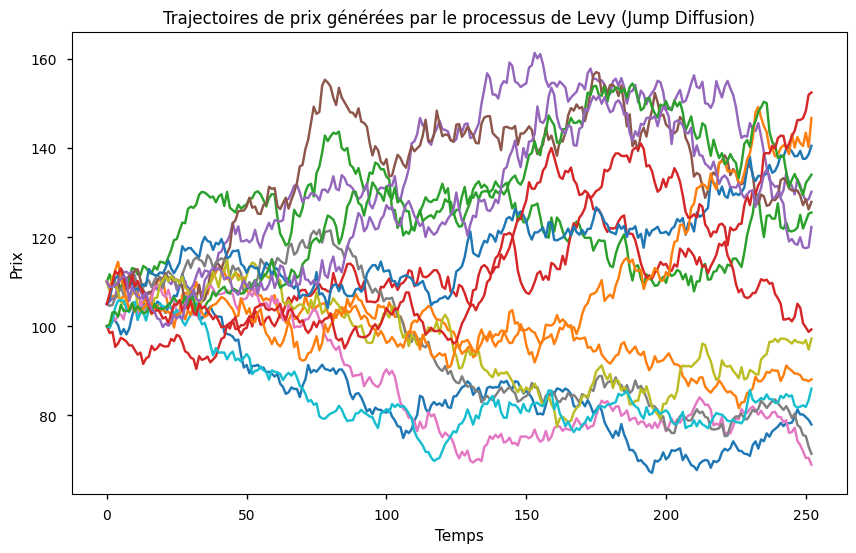

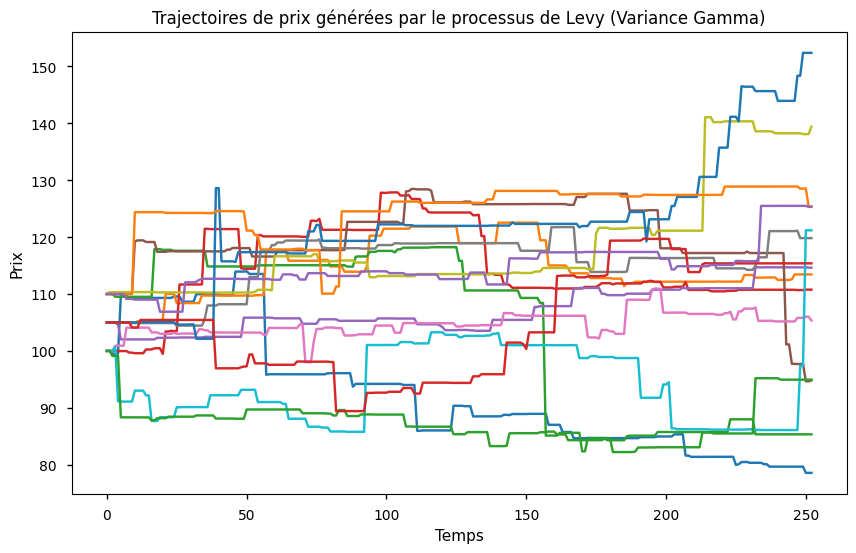

In [29]:
from basketoptions.models.levy_processes import JumpDiffusionProcess, VarianceGammaProcess

# On choisit le modèle de Levy que l'on veut utiliser
# Par exemple, JumpDiffusionProcess
levy_model = JumpDiffusionProcess(
    spot_prices=spot_prices,
    weights=weights,
    correlation_matrix=correlation_matrix,
    risk_free_rate=risk_free_rate,
    dividend_yields=dividend_yields,
    time_to_maturity=time_to_maturity,
    drift=drift,
    volatilities=volatilities,
    jump_intensity=jump_intensity,
    jump_mean=jump_mean,
    jump_std=jump_std,
    num_steps=num_steps
)

# Génération de trajectoires de prix en utilisant le processus de Levy
price_paths_levy = levy_model.generate_paths(num_simulations)

# Visualisation de quelques trajectoires générées
plt.figure(figsize=(10, 6))
for i in range(5):
    plt.plot(price_paths_levy[i])
plt.title('Trajectoires de prix générées par le processus de Levy (Jump Diffusion)')
plt.xlabel('Temps')
plt.ylabel('Prix')
plt.show()

# On peut également essayer le modèle VarianceGammaProcess
vg_model = VarianceGammaProcess(
    spot_prices=spot_prices,
    weights=weights,
    correlation_matrix=correlation_matrix,
    risk_free_rate=risk_free_rate,
    dividend_yields=dividend_yields,
    time_to_maturity=time_to_maturity,
    volatilities=volatilities,
    theta=np.array([0.1, 0.15, 0.2]),  # Paramètre theta pour le processus Gamma
    nu=np.array([0.2, 0.25, 0.3]),  # Paramètre nu pour le processus Gamma
    num_steps=num_steps
)

# Génération de trajectoires de prix en utilisant le processus Variance Gamma
price_paths_vg = vg_model.generate_paths(num_simulations)

# Visualisation de quelques trajectoires générées
plt.figure(figsize=(10, 6))
for i in range(5):
    plt.plot(price_paths_vg[i])
plt.title('Trajectoires de prix générées par le processus de Levy (Variance Gamma)')
plt.xlabel('Temps')
plt.ylabel('Prix')
plt.show()

On remarque une différence dans l'allure des processus générés.

## Application d’un modèle de volatilité stochastique à une option basket

Ici, nous allons appliquer un modèle de volatilité stochastique à une option basket, visualiser la progression des processus générés et illustrer l’évolution de la volatilité au fil du temps.

### Étapes de la démonstration :
1. Définir les paramètres du modèle de volatilité stochastique.
2. Utiliser la simulation pour générer des trajectoires de prix et de volatilité.
3. Visualiser les trajectoires générées.

In [30]:
# Paramètres du modèle de volatilité stochastique
spot_prices = np.array([100, 105])  # Prix initiaux des actifs sous-jacents
weights = np.array([0.5, 0.5])  # Poids des actifs dans le panier
initial_variances = np.array([0.04, 0.05])  # Variances initiales pour Heston
initial_volatilities = np.array([0.2, 0.25])  # Volatilités initiales pour SABR
correlation_matrix = np.array([
    [1.0, 0.2],
    [0.2, 1.0]
])  # Matrice de corrélation entre les actifs
risk_free_rate = 0.05  # Taux d'intérêt sans risque
dividend_yields = np.array([0.02, 0.03])  # Rendements des dividendes des actifs
time_to_maturity = 1.0  # Échéance en années
kappa = np.array([2.0, 1.5])  # Taux de retour à la moyenne pour Heston
theta = np.array([0.04, 0.05])  # Variance à long terme pour Heston
sigma = np.array([0.2, 0.25])  # Volatilité de la variance pour Heston
rho_heston = np.array([0.5, -0.5])  # Corrélation pour Heston
alpha = np.array([0.1, 0.15])  # Paramètre alpha pour SABR
beta = np.array([0.5, 0.5])  # Paramètre beta pour SABR
rho_sabr = np.array([0.5, -0.5])  # Corrélation pour SABR
nu = np.array([0.2, 0.3])  # Paramètre nu pour SABR
num_steps = 252  # Nombre de pas dans la simulation

# Nombre de simulations
num_simulations = 10000

# Affichage des paramètres
print("Paramètres du modèle de volatilité stochastique:")
print(f"spot_prices: {spot_prices}")
print(f"weights: {weights}")
print(f"initial_variances: {initial_variances}")
print(f"initial_volatilities: {initial_volatilities}")
print(f"correlation_matrix: {correlation_matrix}")
print(f"risk_free_rate: {risk_free_rate}")
print(f"dividend_yields: {dividend_yields}")
print(f"time_to_maturity: {time_to_maturity}")
print(f"kappa: {kappa}")
print(f"theta: {theta}")
print(f"sigma: {sigma}")
print(f"rho_heston: {rho_heston}")
print(f"alpha: {alpha}")
print(f"beta: {beta}")
print(f"rho_sabr: {rho_sabr}")
print(f"nu: {nu}")
print(f"num_steps: {num_steps}")
print(f"num_simulations: {num_simulations}")

Paramètres du modèle de volatilité stochastique:
spot_prices: [100 105]
weights: [0.5 0.5]
initial_variances: [0.04 0.05]
initial_volatilities: [0.2  0.25]
correlation_matrix: [[1.  0.2]
 [0.2 1. ]]
risk_free_rate: 0.05
dividend_yields: [0.02 0.03]
time_to_maturity: 1.0
kappa: [2.  1.5]
theta: [0.04 0.05]
sigma: [0.2  0.25]
rho_heston: [ 0.5 -0.5]
alpha: [0.1  0.15]
beta: [0.5 0.5]
rho_sabr: [ 0.5 -0.5]
nu: [0.2 0.3]
num_steps: 252
num_simulations: 10000


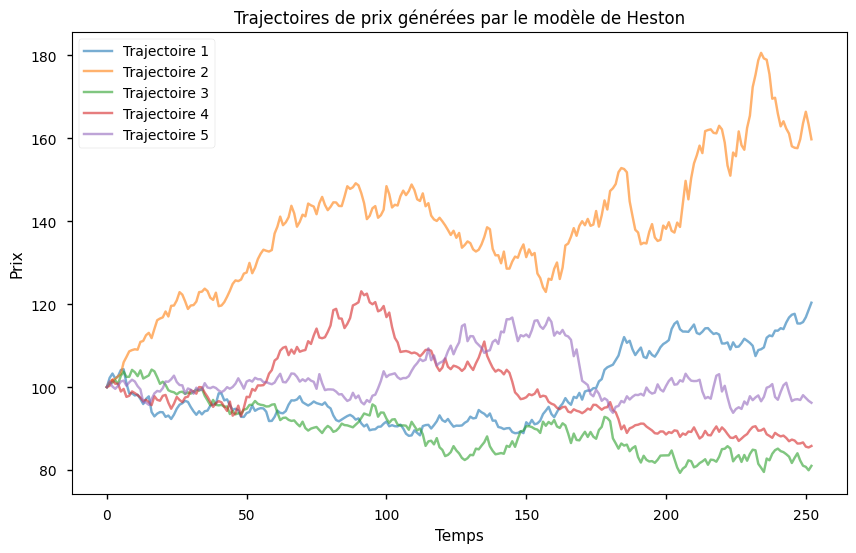

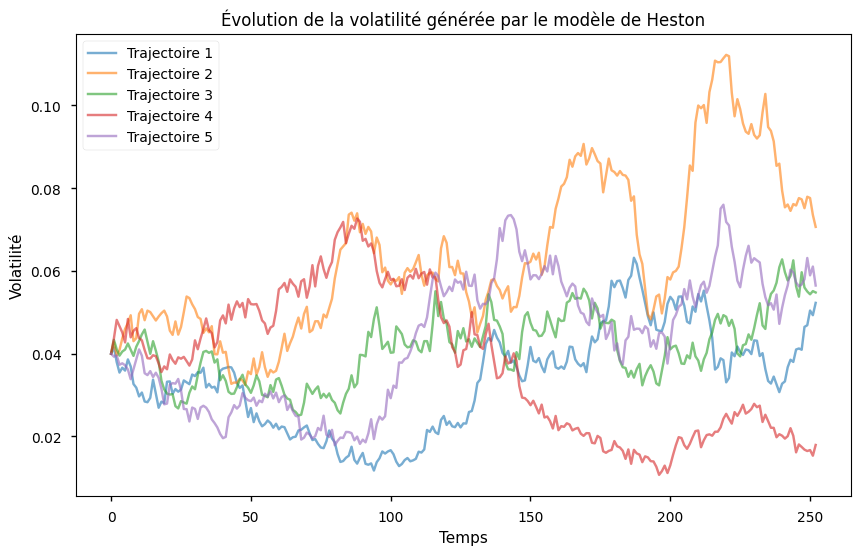

In [31]:
from basketoptions.models.stochastic_volatility import HestonModel

# Instantiation du modèle Heston
heston_model = HestonModel(
    spot_prices=spot_prices,
    weights=weights,
    initial_variances=initial_variances,
    correlation_matrix=correlation_matrix,
    risk_free_rate=risk_free_rate,
    dividend_yields=dividend_yields,
    time_to_maturity=time_to_maturity,
    kappa=kappa,
    theta=theta,
    sigma=sigma,
    rho=rho_heston,
    num_steps=num_steps
)

# Génération des trajectoires de prix et de volatilité
price_paths_heston, volatilities_heston = heston_model.generate_paths(num_simulations)

# Visualisation de quelques trajectoires générées
plt.figure(figsize=(10, 6))
for i in range(5):
    plt.plot(price_paths_heston[i, :, 0], label=f'Trajectoire {i+1}', alpha=0.6)
plt.title('Trajectoires de prix générées par le modèle de Heston')
plt.xlabel('Temps')
plt.ylabel('Prix')
plt.legend()
plt.show()

# Visualisation de l'évolution de la volatilité pour le premier actif
plt.figure(figsize=(10, 6))
for i in range(5):
    plt.plot(volatilities_heston[i, :, 0], label=f'Trajectoire {i+1}', alpha=0.6)
plt.title('Évolution de la volatilité générée par le modèle de Heston')
plt.xlabel('Temps')
plt.ylabel('Volatilité')
plt.legend()
plt.show()

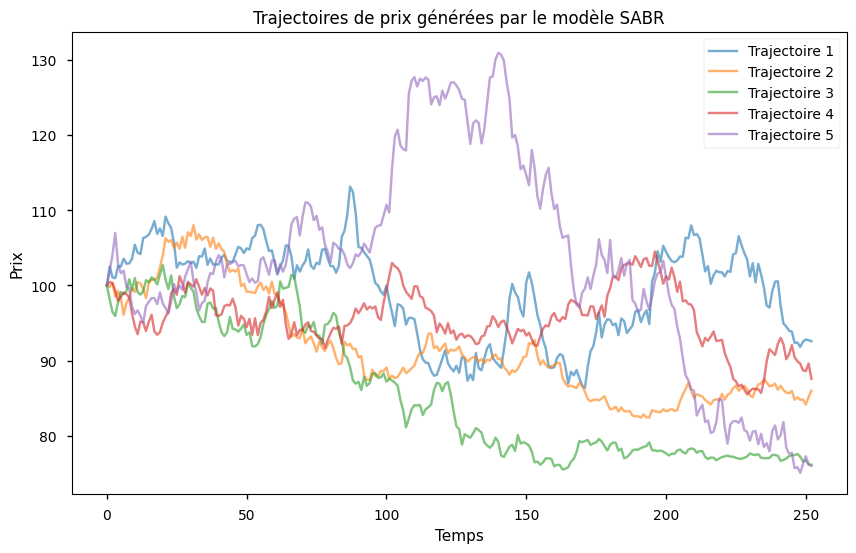

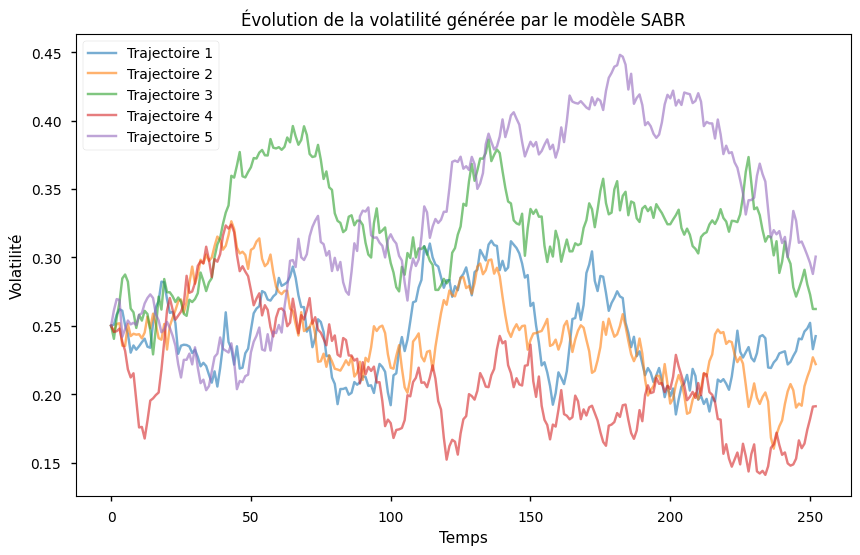

In [32]:
from basketoptions.models.stochastic_volatility import SABRModel

# Instantiation du modèle SABR
sabr_model = SABRModel(
    spot_prices=spot_prices,
    weights=weights,
    initial_volatilities=initial_volatilities,
    correlation_matrix=correlation_matrix,
    risk_free_rate=risk_free_rate,
    dividend_yields=dividend_yields,
    time_to_maturity=time_to_maturity,
    alpha=alpha,
    beta=beta,
    rho=rho_sabr,
    nu=nu,
    num_steps=num_steps
)

# Génération des trajectoires de prix et de volatilité
price_paths_sabr, volatilities_sabr = sabr_model.generate_paths(num_simulations)

# Visualisation de quelques trajectoires générées
plt.figure(figsize=(10, 6))
for i in range(5):
    plt.plot(price_paths_sabr[i, :, 0], label=f'Trajectoire {i+1}', alpha=0.6)
plt.title('Trajectoires de prix générées par le modèle SABR')
plt.xlabel('Temps')
plt.ylabel('Prix')
plt.legend()
plt.show()

# Visualisation de l'évolution de la volatilité pour le premier actif
plt.figure(figsize=(10, 6))
for i in range(5):
    plt.plot(volatilities_sabr[i, :, 1], label=f'Trajectoire {i+1}', alpha=0.6)
plt.title('Évolution de la volatilité générée par le modèle SABR')
plt.xlabel('Temps')
plt.ylabel('Volatilité')
plt.legend()
plt.show()

## Introduction à la méthode des différences finies (Attention : cette section n'est pas fonctionnelle pour le moment)

Cette section présente une tentative d'utilisation de la méthode des différences finies pour pricer une option basket répondante à l'équation de Black-Scholes.

### Étapes de la démonstration :
1. Définir les paramètres du modèle de différences finies.
2. Utiliser la méthode des différences finies pour calculer le prix de l'option.
3. Visualiser la solution numérique.

On commence par un rappel ci-dessous des équations en jeu dans l'algorithme.

### L'EDS de Black-Scholes en plusieurs dimensions

L'équation de Black-Scholes en plusieurs dimensions pour une option basket peut être formulée comme suit:

$$ dS_i(t) = S_i(t) \left( r - q_i \right) dt + S_i(t) \sigma_i dW_i(t) \quad \text{pour} \quad i = 1, \ldots, n $$

où :
- $ S_i(t) $ est le prix de l'actif $ i $ à l'instant $ t $
- $ r $ est le taux d'intérêt sans risque
- $ q_i $ est le taux de dividende de l'actif $ i $
- $ \sigma_i $ est la volatilité de l'actif $ i $
- $ W_i(t) $ est un mouvement brownien standard pour l'actif $ i $
- $ n $ est le nombre d'actifs dans le panier

L'équation différentielle partielle (EDP) correspondante pour le prix de l'option $ V(t, S) $ est :

$$ \frac{\partial V}{\partial t} + \sum_{i=1}^n \left( r - q_i \right) S_i \frac{\partial V}{\partial S_i} + \frac{1}{2} \sum_{i=1}^n \sum_{j=1}^n \rho_{ij} \sigma_i \sigma_j S_i S_j \frac{\partial^2 V}{\partial S_i \partial S_j} - rV = 0 $$

où :
- $ \rho_{ij} $ est le coefficient de corrélation entre les mouvements browniens $ W_i(t) $ et $ W_j(t) $

### Version discrétisée de cette équation utilisée dans ce programme

La méthode des différences finies est utilisée pour discrétiser l'équation de Black-Scholes en plusieurs dimensions. Voici comment cette discrétisation est implémentée dans le programme :

#### Transformation et configuration de la grille

1. Définir les limites de la grille des prix des actifs $ S_{\text{min}} $ et $ S_{\text{max}} $
2. Définir le pas de la grille $ h $ pour chaque actif
3. Discrétiser le temps avec un pas $ \Delta t = \frac{\tau_{\text{final}}}{N} $ où $ N $ est le nombre de pas de temps

#### Conditions initiales

Calculer la valeur de l'option à l'échéance en utilisant le payoff de l'option :

$$ V(S_1, S_2, \ldots, S_n, T) = \max\left( \sum_{i=1}^n w_i S_i - K, 0 \right) \quad \text{pour une option call} $$

#### Discrétisation en temps

À chaque pas de temps, les valeurs de l'option sont mises à jour en utilisant les coefficients de diffusion et de dérivées croisées :

$$ V_{t+1}(i,j) = V_t(i,j) + \Delta t \left( L V_t(i,j) \right) $$

où $ L $ est l'opérateur différentiel qui inclut les dérivées premières et secondes par rapport aux prix des actifs.

L'opérateur $ L $ est discrétisé comme suit pour chaque actif $ i $ et $ j $ :

$$ \frac{\partial V}{\partial S_i} \approx \frac{V(S_i + h, \cdot) - V(S_i - h, \cdot)}{2h} $$

$$ \frac{\partial^2 V}{\partial S_i^2} \approx \frac{V(S_i + h, \cdot) - 2V(S_i, \cdot) + V(S_i - h, \cdot)}{h^2} $$

Les termes croisés sont discrétisés de manière similaire en tenant compte des corrélations entre les actifs :

$$ \frac{\partial^2 V}{\partial S_i \partial S_j} \approx \frac{V(S_i + h, S_j + h) - V(S_i + h, S_j - h) - V(S_i - h, S_j + h) + V(S_i - h, S_j - h)}{4h^2} $$

L'opérateur $ L $ est donc approximé en utilisant ces différences finies :

$$ L V \approx \sum_{i=1}^n \left( r - q_i \right) S_i \frac{\partial V}{\partial S_i} + \frac{1}{2} \sum_{i=1}^n \sum_{j=1}^n \rho_{ij} \sigma_i \sigma_j S_i S_j \frac{\partial^2 V}{\partial S_i \partial S_j} - rV $$

En appliquant cette méthode à chaque pas de temps, on obtient une solution approximative de l'équation de Black-Scholes en plusieurs dimensions pour le prix de l'option basket.

In [33]:
# Cellule 15: Définir les paramètres du modèle de différences finies
import numpy as np
from basketoptions.models.black_scholes import BlackScholesModel
from basketoptions.pricing.finite_difference_bs import finite_difference_multidim_bs_pricing

# Paramètres du modèle de Black-Scholes pour une option basket
spot_prices = np.array([100, 105])  # Prix initiaux des actifs sous-jacents
weights = np.array([0.5, 0.5])  # Poids des actifs dans le panier
volatilities = np.array([0.2, 0.25])  # Volatilités des actifs
correlation_matrix = np.array([
    [1.0, 0.2],
    [0.2, 1.0]
])  # Matrice de corrélation entre les actifs
risk_free_rate = 0.05  # Taux d'intérêt sans risque
dividend_yields = np.array([0.02, 0.03])  # Rendements des dividendes des actifs
time_to_maturity = 1.0  # Échéance en années
strike_price = 100  # Prix d'exercice de l'option
option_type = 'call'  # Type d'option ('call' ou 'put')
num_steps = 100  # Nombre de pas de temps
num_grid_points = 50  # Nombre de points de grille par dimension

# Création du modèle Black-Scholes
bs_model = BlackScholesModel(
    spot_prices=spot_prices,
    weights=weights,
    volatilities=volatilities,
    correlation_matrix=correlation_matrix,
    risk_free_rate=risk_free_rate,
    dividend_yields=dividend_yields,
    time_to_maturity=time_to_maturity
)

# Affichage des paramètres
print("Paramètres du modèle de différences finies pour Black-Scholes:")
print(f"spot_prices: {spot_prices}")
print(f"weights: {weights}")
print(f"volatilities: {volatilities}")
print(f"correlation_matrix: {correlation_matrix}")
print(f"risk_free_rate: {risk_free_rate}")
print(f"dividend_yields: {dividend_yields}")
print(f"time_to_maturity: {time_to_maturity}")
print(f"strike_price: {strike_price}")
print(f"option_type: {option_type}")
print(f"num_steps: {num_steps}")
print(f"num_grid_points: {num_grid_points}")

Paramètres du modèle de différences finies pour Black-Scholes:
spot_prices: [100 105]
weights: [0.5 0.5]
volatilities: [0.2  0.25]
correlation_matrix: [[1.  0.2]
 [0.2 1. ]]
risk_free_rate: 0.05
dividend_yields: [0.02 0.03]
time_to_maturity: 1.0
strike_price: 100
option_type: call
num_steps: 100
num_grid_points: 50


In [34]:
# Cellule 16: Calcul du prix de l'option par différences finies
# Calcul du prix de l'option en utilisant la méthode des différences finies
option_price_fd = finite_difference_multidim_bs_pricing(
    model=bs_model,
    strike_price=strike_price,
    option_type=option_type,
    num_steps=num_steps,
    num_grid_points=num_grid_points
)

# Affichage du prix de l'option
#print(f"Prix de l'option calculé par différences finies: {option_price_fd:.2f}")
option_price_fd

/Users/dorian/Desktop/Cours_ESCP/Master Thesis/basketoptions/pricing/finite_difference_bs.py:89: RuntimeWarning: invalid value encountered in scalar divide
  return (np.sin(omega/2) / (omega/2))**4 * (1 + 2/3 * np.sin(omega/2)**2)


array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0., nan, nan, ..., nan, nan,  0.],
       [ 0., nan, nan, ..., nan, nan,  0.],
       ...,
       [ 0., nan, nan, ..., nan, nan,  0.],
       [ 0., nan, nan, ..., nan, nan,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]])

Comme on peut le voir le code présenté ci-avant n'est pas fonctionnel (c'est plus précisément dans le module finite_difference_bs que se trouve le problème), je laisse la section cependant afin qu'elle puisse servir à de potentiels futurs tests.

## Approximations analytiques

Dans cette section, nous utilisons les approximations analytiques présentées dans le rapport pour calculer le prix d’une option basket. Nous comparerons ces approximations avec les méthodes numériques et analytiques exactes.

### Étapes de la démonstration :
1. Calcul du prix d'une option basket en utilisant l'approximation par moment matching (comparé avec Monte Carlo) qui servira de base aux développements de Taylor
2. Décalage des prix spot et calcul du prix de l'option en utilisant le développement de Taylor
3. Comparaison avec les méthodes numériques sur les prix spot décalés

In [35]:

import numpy as np
from basketoptions.models.black_scholes import BlackScholesModel
from basketoptions.pricing.analytical_approximations import moment_matching_approximation, taylor_series_approximation

# Paramètres du modèle de Black-Scholes pour une option basket
spot_prices = np.array([100, 105])  # Prix initiaux des actifs sous-jacents
weights = np.array([0.5, 0.5])  # Poids des actifs dans le panier
volatilities = np.array([0.2, 0.25])  # Volatilités des actifs
correlation_matrix = np.array([
    [1.0, 0.2],
    [0.2, 1.0]
])  # Matrice de corrélation entre les actifs
risk_free_rate = 0.05  # Taux d'intérêt sans risque
dividend_yields = np.array([0.02, 0.03])  # Rendements des dividendes des actifs
time_to_maturity = 1.0  # Échéance en années
strike_price = 100  # Prix d'exercice de l'option
option_type = 'call'  # Type d'option ('call' ou 'put')
num_steps = 100  # Nombre de pas de temps
num_grid_points = 50  # Nombre de points de grille par dimension

# Création du modèle Black-Scholes
bs_model = BlackScholesModel(
    spot_prices=spot_prices,
    weights=weights,
    volatilities=volatilities,
    correlation_matrix=correlation_matrix,
    risk_free_rate=risk_free_rate,
    dividend_yields=dividend_yields,
    time_to_maturity=time_to_maturity
)

# Affichage des paramètres
print("Paramètres du modèle pour les approximations analytiques:")
print(f"spot_prices: {spot_prices}")
print(f"weights: {weights}")
print(f"volatilities: {volatilities}")
print(f"correlation_matrix: {correlation_matrix}")
print(f"risk_free_rate: {risk_free_rate}")
print(f"dividend_yields: {dividend_yields}")
print(f"time_to_maturity: {time_to_maturity}")
print(f"strike_price: {strike_price}")
print(f"option_type: {option_type}")

Paramètres du modèle pour les approximations analytiques:
spot_prices: [100 105]
weights: [0.5 0.5]
volatilities: [0.2  0.25]
correlation_matrix: [[1.  0.2]
 [0.2 1. ]]
risk_free_rate: 0.05
dividend_yields: [0.02 0.03]
time_to_maturity: 1.0
strike_price: 100
option_type: call


In [36]:

# Calcul du prix de l'option en utilisant l'approximation par moment matching
price_moment_matching = moment_matching_approximation(
    model=bs_model,
    strike_price=strike_price,
    option_type=option_type
)

price_monte_carlo = bs_model.price(
    strike_price=strike_price,
    option_type=option_type,
    method='monte_carlo',
    num_paths=100000
)


# Affichage du prix de l'option par Monte Carlo
print(f"Prix de l'option par Monte Carlo: {price_monte_carlo:.2f}")

# Affichage du prix de l'option par moment matching
print(f"Prix de l'option par moment matching: {price_moment_matching:.2f}")

Prix de l'option par Monte Carlo: 9.54
Prix de l'option par moment matching: 9.49


In [37]:
# Déviation des prix pour l'approximation par série de Taylor
new_spot_prices = np.array([102, 107])
initial_prices = price_monte_carlo

# Calcul du prix de l'option en utilisant l'approximation par série de Taylor (ordre 1)
price_taylor_first_order = taylor_series_approximation(
    model=bs_model,
    strike_price=strike_price,
    option_type=option_type,
    spot_prices=new_spot_prices,
    order=1, 
    initial_price = initial_prices
)

# Calcul du prix de l'option en utilisant l'approximation par série de Taylor (ordre 2)
price_taylor_second_order = taylor_series_approximation(
    model=bs_model,
    strike_price=strike_price,
    option_type=option_type,
    spot_prices=new_spot_prices,
    order=2,
    initial_price = initial_prices
)

# Affichage des prix de l'option par série de Taylor
print(f"Prix de l'option par série de Taylor (ordre 1): {price_taylor_first_order:.2f}")
print(f"Prix de l'option par série de Taylor (ordre 2): {price_taylor_second_order:.2f}")

Prix de l'option par série de Taylor (ordre 1): 10.70
Prix de l'option par série de Taylor (ordre 2): 10.63


In [38]:
# Calcul du prix de l'option par Monte Carlo pour comparaison
bs_model.spot_prices = new_spot_prices

price_monte_carlo = bs_model.price(
    strike_price=strike_price,
    option_type=option_type,
    method='monte_carlo',
    num_paths=100000
)

price_moment_matching = moment_matching_approximation(
    model=bs_model,
    strike_price=strike_price,
    option_type=option_type
)

# Comparaison des résultats
print("\nComparaison des prix de l'option basket:")
print(f"Moment Matching: {price_moment_matching:.2f}")
print(f"Série de Taylor (ordre 1): {price_taylor_first_order:.2f}")
print(f"Série de Taylor (ordre 2): {price_taylor_second_order:.2f}")
print(f"Monte Carlo: {price_monte_carlo:.2f}")


Comparaison des prix de l'option basket:
Moment Matching: 10.79
Série de Taylor (ordre 1): 10.70
Série de Taylor (ordre 2): 10.63
Monte Carlo: 10.86


On remarque en général à l'exécution des cellules précédentes que le développement de Taylor à l'ordre 2 est souvent moins précis que le développement au premier ordre.
L'origine d'un tel comportement un peu paradoxal se trouve sans aucun doute dans l'imprécision du calcul des grecques qui servent au développement (delta et gamma) et du prix de base (tous calculés via Monte Carlo). En effet la taille cumulée de ces imprécisions est supérieure au gain de précision apporté par l'ajout du 2nd ordre... qui n'apporte donc rien !

## Méthode de quadrature pour l’intégration numérique

Dans les cellules qui suivent, on utilise la méthode de quadrature pour estimer le prix de nos options. La méthode de quadrature permet une intégration numérique précise en utilisant des points de quadrature et des poids spécifiques. Nous allons également visualiser la convergence de cette méthode en fonction du nombre de points de quadrature.

### Étapes de la démonstration :
1. Application de la méthode de quadrature pour estimer le prix d'une option.
2. Graphique montrant la convergence de la méthode.

In [4]:
import numpy as np
from basketoptions.models.black_scholes import BlackScholesModel
from basketoptions.pricing.quadrature import gaussian_quadrature_pricing

# Paramètres du modèle de Black-Scholes pour une option basket
spot_prices = np.array([100, 105])  # Prix initiaux des actifs sous-jacents
weights = np.array([0.5, 0.5])  # Poids des actifs dans le panier
volatilities = np.array([0.2, 0.25])  # Volatilités des actifs
correlation_matrix = np.array([
    [1.0, 0.2],
    [0.2, 1.0]
])  # Matrice de corrélation entre les actifs
risk_free_rate = 0.05  # Taux d'intérêt sans risque
dividend_yields = np.array([0.02, 0.03])  # Rendements des dividendes des actifs
time_to_maturity = 1.0  # Échéance en années
strike_price = 100  # Prix d'exercice de l'option
option_type = 'call'  # Type d'option ('call' ou 'put')

# Création du modèle Black-Scholes
bs_model = BlackScholesModel(
    spot_prices=spot_prices,
    weights=weights,
    volatilities=volatilities,
    correlation_matrix=correlation_matrix,
    risk_free_rate=risk_free_rate,
    dividend_yields=dividend_yields,
    time_to_maturity=time_to_maturity,
    num_steps=252
)

# Affichage des paramètres
print("Paramètres du modèle pour la méthode de quadrature:")
print(f"spot_prices: {spot_prices}")
print(f"weights: {weights}")
print(f"volatilities: {volatilities}")
print(f"correlation_matrix: {correlation_matrix}")
print(f"risk_free_rate: {risk_free_rate}")
print(f"dividend_yields: {dividend_yields}")
print(f"time_to_maturity: {time_to_maturity}")
print(f"strike_price: {strike_price}")
print(f"option_type: {option_type}")

Paramètres du modèle pour la méthode de quadrature:
spot_prices: [100 105]
weights: [0.5 0.5]
volatilities: [0.2  0.25]
correlation_matrix: [[1.  0.2]
 [0.2 1. ]]
risk_free_rate: 0.05
dividend_yields: [0.02 0.03]
time_to_maturity: 1.0
strike_price: 100
option_type: call


In [5]:
# Calcul du prix de l'option en utilisant la méthode de quadrature
num_points = 5000  # Nombre de points de quadrature
option_price_quad = gaussian_quadrature_pricing(
    model=bs_model,
    strike_price=strike_price,
    option_type=option_type,
    num_points=num_points
)

# Affichage du prix de l'option par quadrature
print(f"Prix de l'option par quadrature (avec {num_points} points): {option_price_quad:.2f}")

Prix de l'option par quadrature (avec 5000 points): 9.89


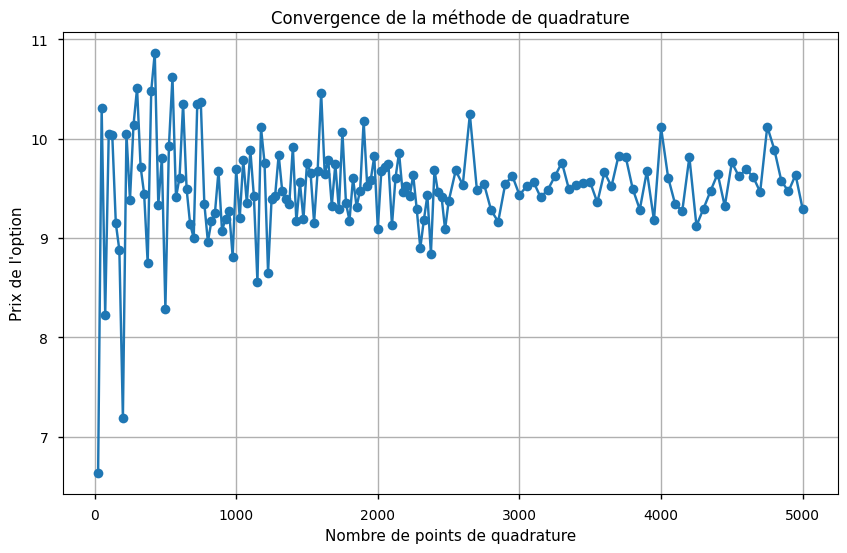

In [11]:
# Cellule 27: Graphique montrant la convergence de la méthode
import matplotlib.pyplot as plt

# Calcul des prix de l'option pour différents nombres de points de quadrature
points_range = [25*(i+1) for i in range(100)]+[50*(i+1) for i in range(50, 100)]

prices_quad = [gaussian_quadrature_pricing(
    model=bs_model,
    strike_price=strike_price,
    option_type=option_type,
    num_points=n) for n in points_range]

# Création du graphique de convergence
plt.figure(figsize=(10, 6))
plt.plot(points_range, prices_quad, marker='o', linestyle='-')
plt.title('Convergence de la méthode de quadrature')
plt.xlabel('Nombre de points de quadrature')
plt.ylabel('Prix de l\'option')
plt.grid(True)
plt.show()

## Génération de données de marché fictives

Ici, nous allons utiliser le fichier `generate_data.py` pour créer des données de marché fictives. Ces données peuvent être utilisées pour tester différents modèles de pricing d'options et stratégies sans avoir besoin de données de marché réelles. Nous allons également visualiser les données générées pour mieux comprendre leur comportement.

### Étapes de la démonstration :
1. Utilisation des fonctions du fichier `generate_data.py` pour générer des données de marché fictives.
2. Visualisation des données générées.

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from basketoptions.analysis.generate_data import generate_random_model_inputs, generate_market_situation, plot_market_situation
from basketoptions.models.black_scholes import BlackScholesModel

# Définir le type de modèle et le nombre d'actifs
model_type = "BlackScholesModel"
num_assets = 3  # Par exemple, un panier de 3 actifs

# Générer des paramètres aléatoires pour le modèle
model_params = generate_random_model_inputs(model_type, num_assets)

# Affichage des paramètres générés
print("Paramètres générés pour le modèle Black-Scholes:")
for key, value in model_params.items():
    print(f"{key}: {value}")

Paramètres générés pour le modèle Black-Scholes:
spot_prices: [133.65525643  69.67472162  65.19047886]
weights: [0.43162485 0.44891269 0.11946246]
risk_free_rate: 0.08652650723208306
dividend_yields: [0.03326123 0.02351269 0.03811993]
time_to_maturity: 1.0
num_steps: 252
correlation_matrix: [[ 1.         -0.9878171   0.94463814]
 [-0.9878171   1.         -0.98316836]
 [ 0.94463814 -0.98316836  1.        ]]
volatilities: [0.17302715 0.49677307 0.12243421]


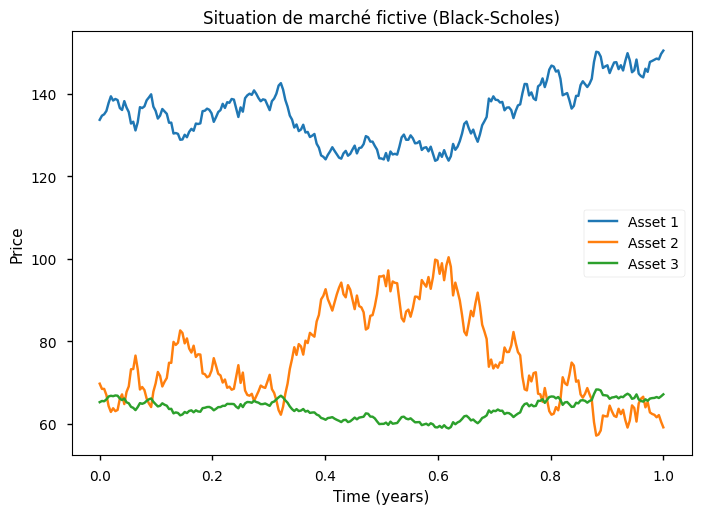

In [13]:
# Générer une situation de marché fictive
market_situation = generate_market_situation(BlackScholesModel, **model_params)

# Visualiser les données de marché générées
plot_market_situation(market_situation, title="Situation de marché fictive (Black-Scholes)")

## Analyse des données de marché

Dans cette démonstration, nous allons utiliser le fichier `market_analysis.py` pour analyser les données de marché générées. Cette analyse comprend la standardisation des données, la réalisation d'une analyse en composantes principales (ACP), et la visualisation des résultats.

### Étapes de la démonstration :
1. Standardisation des données.
2. Réalisation d'une analyse en composantes principales (ACP).

Paramètres générés pour le modèle Black-Scholes:
spot_prices: [ 74.15513567  70.99419469 146.54004465 107.26891243  89.60751211
 125.84690239  71.90214203 130.27095057  84.14964517  57.53817685
  98.80110026  83.45186701  55.64703191  73.55478085  77.89272625]
weights: [0.01229115 0.01375727 0.00975415 0.02623873 0.12963407 0.08169208
 0.13503897 0.09496296 0.01422217 0.12908801 0.03798957 0.11308838
 0.02151459 0.14410091 0.03662701]
risk_free_rate: 0.14207541641372523
dividend_yields: [0.04776805 0.01354707 0.04168153 0.04912263 0.0336578  0.03781198
 0.02085193 0.01375298 0.04177474 0.03802013 0.02761652 0.02303352
 0.03336562 0.0475306  0.02810093]
time_to_maturity: 1.0
num_steps: 252
correlation_matrix: [[ 1.00000000e+00 -2.27554414e-02 -1.92352657e-01 -6.55340073e-02
  -1.23498983e-01 -8.37729652e-02  1.38438078e-01  1.70557635e-01
   2.21529322e-01 -1.52462445e-02 -5.02570964e-02  4.54671417e-01
  -2.98838785e-01  1.41628222e-01 -4.78622680e-04]
 [-2.27554414e-02  1.00000000e+00

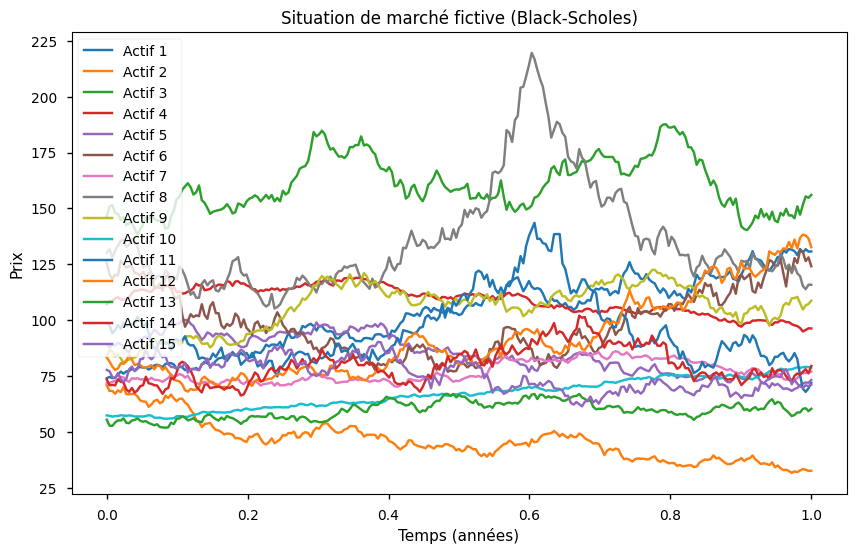

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from basketoptions.analysis.generate_data import generate_random_model_inputs, generate_market_situation
from basketoptions.models.black_scholes import BlackScholesModel

# Définir le type de modèle et le nombre d'actifs
model_type = "BlackScholesModel"
num_assets = 15  # Par exemple, un panier de 3 actifs

# Générer des paramètres aléatoires pour le modèle
model_params = generate_random_model_inputs(model_type, num_assets)

# Générer une situation de marché fictive
market_situation = generate_market_situation(BlackScholesModel, **model_params)

# Afficher les paramètres générés
print("Paramètres générés pour le modèle Black-Scholes:")
for key, value in model_params.items():
    print(f"{key}: {value}")

# Visualiser les données de marché générées
plt.figure(figsize=(10, 6))
time = np.linspace(0, model_params['time_to_maturity'], market_situation.shape[0])
for i in range(market_situation.shape[1]):
    plt.plot(time, market_situation[:, i], label=f'Actif {i+1}')
plt.title('Situation de marché fictive (Black-Scholes)')
plt.xlabel('Temps (années)')
plt.ylabel('Prix')
plt.legend()
plt.show()

Variance expliquée par chaque composante principale:
[4.90973411e-01 2.36805579e-01 1.31638481e-01 7.24864786e-02
 1.87602156e-02 1.48839703e-02 1.00600052e-02 9.92205128e-03
 6.95667614e-03 2.92553155e-03 2.36605473e-03 1.11725853e-03
 8.96274166e-04 1.43948110e-04 6.40648161e-05]


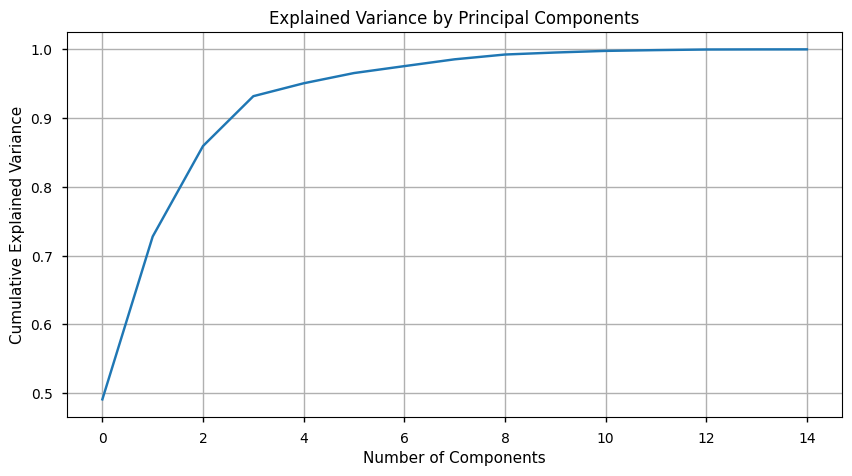

In [15]:
# Standardisation des données et réalisation de l'ACP
from basketoptions.analysis.market_analysis import standardize_data, perform_pca, plot_explained_variance, plot_principal_components

# Standardiser les données de marché générées
standardized_data, scaler = standardize_data(market_situation)

# Réaliser l'ACP
principal_components, explained_variance_ratio, loadings = perform_pca(standardized_data)

# Afficher les résultats de l'ACP
print("Variance expliquée par chaque composante principale:")
print(explained_variance_ratio)

# Graphique de la variance expliquée cumulée
plot_explained_variance(explained_variance_ratio)


## Stratégies de couverture delta

Dans cette section, nous allons implémenter une stratégie de couverture delta pour une option basket et illustrer son efficacité.

### Étapes de la démonstration :
1. Génération de la situation de marché initiale.
2. Calcul des deltas des actifs.
3. Réalisation de la couverture delta.
4. Illustration de l’efficacité de la stratégie de couverture.

In [ ]:
# Calcul du vecteur de deltas et couverture de la position sur une option
import numpy as np
import matplotlib.pyplot as plt
from basketoptions.models.black_scholes import BlackScholesModel
from basketoptions.models.levy_processes import JumpDiffusionProcess, VarianceGammaProcess
from basketoptions.models.stochastic_volatility import HestonModel, SABRModel
from basketoptions.analysis.generate_data import generate_random_model_inputs

# Définir les paramètres de l'option et du panier d'actifs
num_assets = 3
strike_price = 100
option_type = 'call'

# Générer des paramètres aléatoires communs pour tous les modèles
common_params = generate_random_model_inputs("BlackScholesModel", num_assets)
common_params['time_to_maturity'] = 1.0  # 1 an
common_params['num_steps'] = 252  # Nombre de pas de temps pour les modèles

# Instancier le modèle Black-Scholes pour l'exemple
bs_model = BlackScholesModel(**common_params)

# Calculer les deltas
deltas = bs_model.deltas(strike_price, option_type)
print(f"Vecteur de deltas: {deltas}")

# Couvrir la position initiale
initial_positions = np.zeros(num_assets)
hedge_positions = initial_positions - deltas
hedge_value_initial = np.dot(common_params['spot_prices'], hedge_positions)

print(f"Positions de couverture initiales: {hedge_positions}")
print(f"Valeur de la couverture initiale: {hedge_value_initial:.2f}")

Vecteur de deltas: [0.27638888 0.28882403 0.23693181]
Positions de couverture initiales: [-0.27638888 -0.28882403 -0.23693181]
Valeur de la couverture initiale: -87.80


In [ ]:
def generate_variations(spot_prices, epsilon, num_variations=5):
    variations = []
    n = len(spot_prices)
    
    for _ in range(num_variations):
        variation = np.zeros(n)
        for i in range(n):
            sign = np.random.choice([-1, 1])
            variation[i] = sign * epsilon
        variations.append(variation)
    
    return np.array(variations)

def calculate_pnl_for_variations(model, spot_prices, strike_price, option_type, variations):
    base_price = model.price(strike_price, option_type)
    pnl_non_covered = []

    for var in variations:
        model.spot_prices += var
        new_price = model.price(strike_price, option_type)
        pnl_non_covered.append(new_price - base_price)
        model.spot_prices -= var

    model.spot_prices = spot_prices  # Réinitialiser les prix
    return np.array(pnl_non_covered)

def calculate_hedged_pnl_for_variations(model, spot_prices, hedge_positions, strike_price, option_type, variations):
    base_hedge_value = np.dot(spot_prices, hedge_positions)
    base_option_price = model.price(strike_price, option_type)
    pnl_hedged = []

    for var in variations:
        model.spot_prices += var
        new_option_price = model.price(strike_price, option_type)
        new_hedge_value = np.dot(model.spot_prices, hedge_positions)
        pnl_hedged.append((new_option_price - base_option_price) + (new_hedge_value - base_hedge_value))
        model.spot_prices -= var

    model.spot_prices = spot_prices  # Réinitialiser les prix
    return np.array(pnl_hedged)

# Définir epsilon et générer des variations
epsilon = 0.5
variations = generate_variations(common_params['spot_prices'], epsilon)
print("Generated variations:")
print(variations)

# Calculer le P&L de l'option non couverte pour chaque variation
pnl_non_covered = calculate_pnl_for_variations(bs_model, common_params['spot_prices'], strike_price, option_type, variations)
print(f"P&L de l'option non couverte: {pnl_non_covered}")

# Calculer le P&L de l'option couverte pour chaque variation
pnl_hedged = calculate_hedged_pnl_for_variations(bs_model, common_params['spot_prices'], hedge_positions, strike_price, option_type, variations)
print(f"P&L de l'option couverte: {pnl_hedged}")

Generated variations:
[[ 0.5 -0.5 -0.5]
 [-0.5 -0.5 -0.5]
 [-0.5  0.5 -0.5]
 [-0.5 -0.5 -0.5]
 [ 0.5 -0.5 -0.5]]
P&L de l'option non couverte: [-0.09797018 -0.3876373  -0.08330542 -0.42932447 -0.06612211]
P&L de l'option couverte: [-0.03801706 -0.01903852  0.02450498 -0.02486553  0.02195388]


Quelques remarques :
- On voit que le plus généralement on arrive à réduire de beaucoup la valeur absolue du P&L (qui est bien notre mesure de risque ici)
- On a déjà fait un remarque plus haut (au niveau du développement de Taylor) sur le manque de précision de nos calculs numériques (il faudrait plus de simulations dans Monte Carlo pour améliorer cela). Cela se ressent notamment par des résultats souvent moins probants sur les P&L faibles, qui sont donc moins fiables pour démontrer l'efficacité de notre couverture : il vaut mieux donc porter son attention sur les P&L plus élevés qui seront plus représentatifs de l'efficacité de notre couverture delta.